#Pull Data From kaggle API:

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
! kaggle datasets download -d kennywarren/uber-eats-as-a-driver-in-orlando

  0% 0.00/2.96k [00:00<?, ?B/s]
100% 2.96k/2.96k [00:00<00:00, 6.34MB/s]


In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile('/content/drive/MyDrive/Uber Eats project/uber-eats-as-a-driver-in-orlando.zip') as zipObj:
   zipObj.extractall('/content/drive/MyDrive/Uber Eats project')

#Importing Libraries:

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Data Pre-Processing

In [200]:
uber_df = pd.read_csv('/content/drive/MyDrive/Uber Eats project/UberEatsData.csv')

In [201]:
uber_df.head()

,Date,DayOfWeek,Time,Expected Earnings,ActualEarnings,Time predicted,Hourly,Distance,ActualTime,Accepted,Boost,ActualBoost,BaseFare,Promotion,Tip,NumberOfDeliveries,Addon,AddedOn,Cancled
0,10/17/2022,Monday,18:34,4.68,NaN,21,13.371429,3.9,NaN,0,1.4,NaN,NaN,NaN,NaN,1,0,0,0
1,10/17/2022,Monday,18:35,7.02,NaN,24,17.550000,5.2,NaN,0,1.4,NaN,NaN,NaN,NaN,1,0,0,0
2,10/17/2022,Monday,18:36,9.53,NaN,36,15.883333,8.4,NaN,0,1.4,NaN,NaN,NaN,NaN,2,0,0,0
3,10/17/2022,Monday,18:37,6.21,6.21,17,21.917647,3.6,14.0,1,1.4,0.133333,1.95,0.26,4.0,1,0,0,0
4,10/17/2022,Monday,18:41,2.44,NaN,15,9.760000,2.6,NaN,0,1.4,NaN,NaN,NaN,NaN,1,1,0,0


In [202]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                109 non-null    object 
 1   DayOfWeek           109 non-null    object 
 2   Time                109 non-null    object 
 3   Expected Earnings   109 non-null    float64
 4   ActualEarnings      21 non-null     float64
 5   Time predicted      109 non-null    int64  
 6   Hourly              109 non-null    float64
 7   Distance            109 non-null    float64
 8   ActualTime          20 non-null     float64
 9   Accepted            109 non-null    int64  
 10  Boost               108 non-null    float64
 11  ActualBoost         19 non-null     float64
 12  BaseFare            19 non-null     float64
 13  Promotion           19 non-null     float64
 14  Tip                 19 non-null     float64
 15  NumberOfDeliveries  109 non-null    int64  
 16  Addon   

In [203]:
uber_df.isnull().mean()*100

Date                   0.000000
DayOfWeek              0.000000
Time                   0.000000
Expected Earnings      0.000000
ActualEarnings        80.733945
Time predicted         0.000000
Hourly                 0.000000
Distance               0.000000
ActualTime            81.651376
Accepted               0.000000
Boost                  0.917431
ActualBoost           82.568807
BaseFare              82.568807
Promotion             82.568807
Tip                   82.568807
NumberOfDeliveries     0.000000
Addon                  0.000000
AddedOn                0.000000
Cancled                0.000000
dtype: float64

In [204]:
uber_df.shape

(109, 19)

# Outlier Detection & Removal - Percentile Method

**Checking Outliers of the Missing values**

- There are values above 15 that are acting as Outliers in **ActualEarnings**
- There are outliers above 50 that needs to be fixed in **ActualTime**
- There are outliers in **Basefare**
- There are outliers in **Promotion**
- There are outliers in **Tip**


<Axes: >

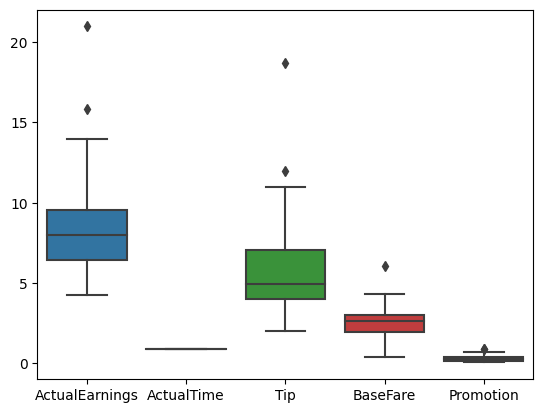

In [249]:
sns.boxplot(data = uber_df.loc[:,["ActualEarnings","ActualTime","Tip","BaseFare", "Promotion"]])

**Actual Earnings**

In [250]:
#Implementing Percentile Method
upper_limit = uber_df['ActualEarnings'].quantile(0.99)
lower_limit = uber_df['ActualEarnings'].quantile(0.01)
print('upper_limit:', upper_limit)
print('lower_limit:', lower_limit)

upper_limit: 19.941120000000012
lower_limit: 4.3902399999999995


In [251]:
 #Locating the Outliers
 uber_df.loc[(uber_df['ActualEarnings']> upper_limit)| (uber_df['ActualEarnings'] < lower_limit)]

,Date,DayOfWeek,Time,Expected Earnings,ActualEarnings,Time predicted,Hourly,Distance,ActualTime,Accepted,Boost,ActualBoost,BaseFare,Promotion,Tip,NumberOfDeliveries,Addon,AddedOn,Cancled
77,10/22/2022,Saturday,19:12,3.79,4.2328,13,17.492308,0.9,0.8882,1,1.4,0.051051,0.62,0.17,2.00,1,1,1,0
88,10/22/2022,Saturday,19:42,20.18,20.9664,35,34.594286,8.7,0.8882,1,1.4,0.207459,4.29,0.89,18.67,2,0,0,0


In [252]:
#Capping
uber_df.loc[(uber_df['ActualEarnings'] > upper_limit), 'ActualEarnings'] = upper_limit
uber_df.loc[(uber_df['ActualEarnings'] < lower_limit), 'ActualEarnings'] = lower_limit

**Actual Time**

In [253]:
#Implementing Percentile Method
upper_limit = uber_df['ActualTime'].quantile(0.99)
lower_limit = uber_df['ActualTime'].quantile(0.01)
print('upper_limit:', upper_limit)
print('lower_limit:', lower_limit)

upper_limit: 0.8882
lower_limit: 0.8882


In [254]:
 #Locating the Outliers
 uber_df.loc[(uber_df['ActualTime']> upper_limit)| (uber_df['ActualTime'] < lower_limit)]

,Date,DayOfWeek,Time,Expected Earnings,ActualEarnings,Time predicted,Hourly,Distance,ActualTime,Accepted,Boost,ActualBoost,BaseFare,Promotion,Tip,NumberOfDeliveries,Addon,AddedOn,Cancled


In [255]:
#Capping
uber_df.loc[(uber_df['ActualTime'] > upper_limit), 'ActualTime'] = upper_limit
uber_df.loc[(uber_df['ActualTime'] < lower_limit), 'ActualTime'] = lower_limit

**Base Fare**

In [256]:
#Implementing Percentile Method
upper_limit = uber_df['BaseFare'].quantile(0.99)
lower_limit = uber_df['BaseFare'].quantile(0.01)
print('upper_limit:', upper_limit)
print('lower_limit:', lower_limit)

upper_limit: 5.7250000000000005
lower_limit: 0.45599999999999996


In [257]:
 #Locating the Outliers
 uber_df.loc[(uber_df['BaseFare']> upper_limit)| (uber_df['BaseFare'] < lower_limit)]

,Date,DayOfWeek,Time,Expected Earnings,ActualEarnings,Time predicted,Hourly,Distance,ActualTime,Accepted,Boost,ActualBoost,BaseFare,Promotion,Tip,NumberOfDeliveries,Addon,AddedOn,Cancled
19,10/18/2022,Tuesday,18:09,6.45,6.45,9,43.000000,0.3,0.8882,1,1.2,0.029954,0.42,0.06,4.95,1,1,1,0
76,10/22/2022,Saturday,19:11,8.21,8.21,18,27.366667,3.1,0.8882,1,1.4,0.051051,6.04,0.17,3.00,1,0,0,0


In [258]:
#Capping
uber_df.loc[(uber_df['ActualTime'] > upper_limit), 'ActualTime'] = upper_limit
uber_df.loc[(uber_df['ActualTime'] < lower_limit), 'ActualTime'] = lower_limit

**Promotion**

In [259]:
#Implementing Percentile Method
upper_limit = uber_df['Promotion'].quantile(0.99)
lower_limit = uber_df['Promotion'].quantile(0.01)
print('upper_limit:', upper_limit)
print('lower_limit:', lower_limit)

upper_limit: 0.8882
lower_limit: 0.0618


In [260]:
 #Locating the Outliers
 uber_df.loc[(uber_df['Promotion']> upper_limit)| (uber_df['Promotion'] < lower_limit)]

,Date,DayOfWeek,Time,Expected Earnings,ActualEarnings,Time predicted,Hourly,Distance,ActualTime,Accepted,Boost,ActualBoost,BaseFare,Promotion,Tip,NumberOfDeliveries,Addon,AddedOn,Cancled
19,10/18/2022,Tuesday,18:09,6.45,6.45000,9,43.000000,0.3,0.8882,1,1.2,0.029954,0.42,0.06,4.95,1,1,1,0
88,10/22/2022,Saturday,19:42,20.18,19.94112,35,34.594286,8.7,0.8882,1,1.4,0.207459,4.29,0.89,18.67,2,0,0,0


In [261]:
#Capping
uber_df.loc[(uber_df['ActualTime'] > upper_limit), 'ActualTime'] = upper_limit
uber_df.loc[(uber_df['ActualTime'] < lower_limit), 'ActualTime'] = lower_limit

**Tip**

In [263]:
#Implementing Percentile Method
upper_limit = uber_df['Tip'].quantile(0.99)
lower_limit = uber_df['Tip'].quantile(0.01)
print('upper_limit:', upper_limit)
print('lower_limit:', lower_limit)

upper_limit: 17.4658
lower_limit: 2.09


In [264]:
 #Locating the Outliers
 uber_df.loc[(uber_df['Tip']> upper_limit)| (uber_df['Tip'] < lower_limit)]

,Date,DayOfWeek,Time,Expected Earnings,ActualEarnings,Time predicted,Hourly,Distance,ActualTime,Accepted,Boost,ActualBoost,BaseFare,Promotion,Tip,NumberOfDeliveries,Addon,AddedOn,Cancled
77,10/22/2022,Saturday,19:12,3.79,4.39024,13,17.492308,0.9,0.8882,1,1.4,0.051051,0.62,0.17,2.00,1,1,1,0
88,10/22/2022,Saturday,19:42,20.18,19.94112,35,34.594286,8.7,0.8882,1,1.4,0.207459,4.29,0.89,18.67,2,0,0,0


In [266]:
#Capping
uber_df.loc[(uber_df['Tip'] > upper_limit), 'Tip'] = upper_limit
uber_df.loc[(uber_df['Tip'] < lower_limit), 'Tip'] = lower_limit

#**Imputating the Values with Median**


The best way to handle missing valies considering the data is small and removing the whole column might cause data loss with inturn would effect the significance of the feature.

Median Seems to be the best approach for this



In [290]:
uber_df['ActualEarnings']= uber_df['ActualEarnings'].fillna(uber_df['ActualEarnings'].median())
uber_df['ActualTime']= uber_df['ActualTime'].fillna(uber_df['ActualTime'].median())
uber_df['ActualBoost']= uber_df['ActualBoost'].fillna(uber_df['ActualBoost'].median())
uber_df['Promotion']= uber_df['Promotion'].fillna(uber_df['Promotion'].median())
uber_df['Tip']= uber_df['Tip'].fillna(uber_df['Tip'].median())
uber_df['BaseFare']= uber_df['BaseFare'].fillna(uber_df['BaseFare'].median())


uber_df.head()

,Date,DayOfWeek,Time,Expected Earnings,ActualEarnings,Time predicted,Hourly,Distance,ActualTime,Accepted,Boost,ActualBoost,BaseFare,Promotion,Tip,NumberOfDeliveries,Addon,AddedOn,Cancled
0,10/17/2022,Monday,18:34,4.68,8.02,21,13.371429,3.9,2.09,0,1.4,0.099476,2.63,0.26,4.95,1,0,0,0
1,10/17/2022,Monday,18:35,7.02,8.02,24,17.550000,5.2,2.09,0,1.4,0.099476,2.63,0.26,4.95,1,0,0,0
2,10/17/2022,Monday,18:36,9.53,8.02,36,15.883333,8.4,2.09,0,1.4,0.099476,2.63,0.26,4.95,2,0,0,0
3,10/17/2022,Monday,18:37,6.21,6.21,17,21.917647,3.6,2.09,1,1.4,0.133333,1.95,0.26,4.00,1,0,0,0
4,10/17/2022,Monday,18:41,2.44,8.02,15,9.760000,2.6,2.09,0,1.4,0.099476,2.63,0.26,4.95,1,1,0,0


# Data Exploration:

Inisghts:

- Only 21% orders could be Accepted.
- 2% of all the orders were rejected - which could be for time constraints, distance or both combined.
- Only 2.7% orders are accepted based on 4.75% of Add-On orders Received
- Expected Earnining From trips is around $6

- Actual Earnings from *each trip is mostly $8*

- Hourly Rate per Delivery is around $18

- The usual Tip received for a Delivery is around $6

- BaseFare for delivering an accepted order is around $2.5

- Promotion Earning From Boost $0.3

- Actual Boost received is 0.10x

In [ ]:

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Accepted Orders": dataframe[dataframe["Accepted"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Accepted Oders","Accepted"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')


<ipython-input-64-aa68812e1f3f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Accepted', y=np.ones(len(uber_df)), data= uber_df, estimator=lambda x: len(x)*100.0/len(uber_df), ci=None,)


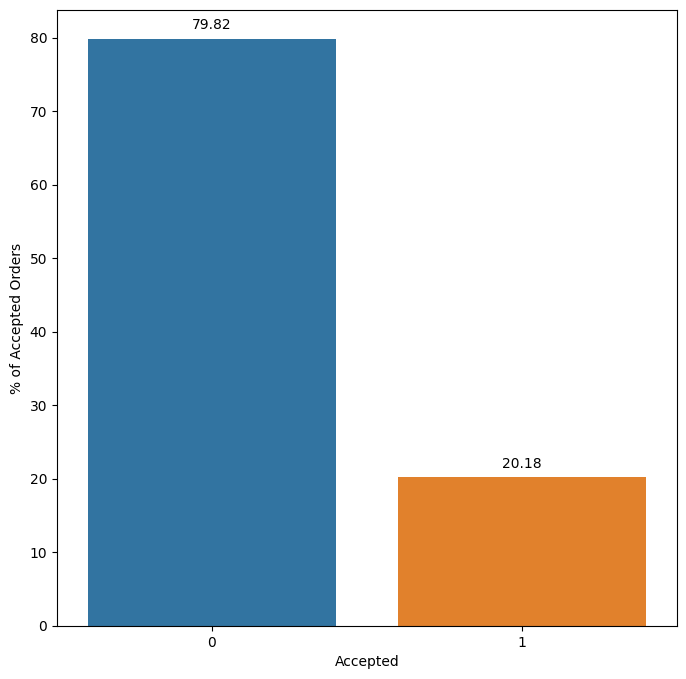

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.barplot(x='Accepted', y=np.ones(len(uber_df)), data= uber_df, estimator=lambda x: len(x)*100.0/len(uber_df), ci=None,)
for p in ax.patches: ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax.set_ylabel("% of Accepted Orders")
plt.show()

<ipython-input-67-b0e2f53a373b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Cancled', y=np.ones(len(uber_df)), data= uber_df, estimator=lambda x: len(x)*100.0/len(uber_df), ci=None,)


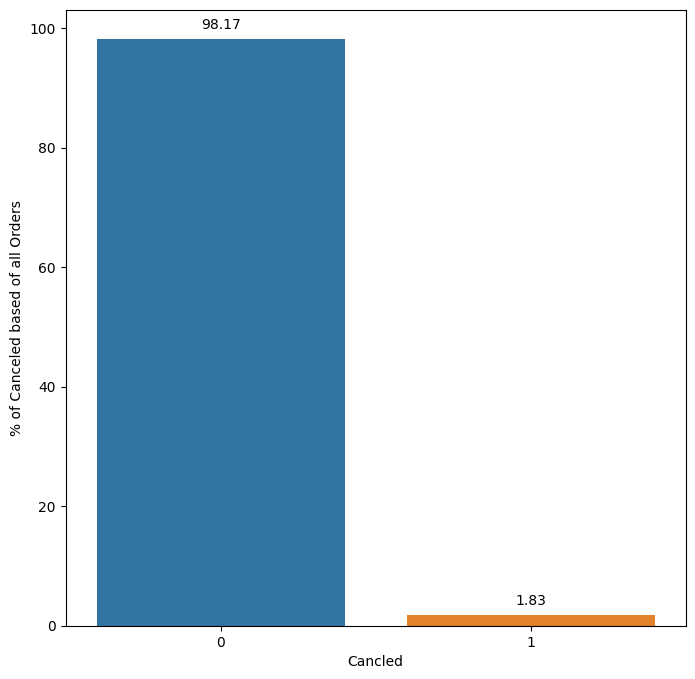

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.barplot(x='Cancled', y=np.ones(len(uber_df)), data= uber_df, estimator=lambda x: len(x)*100.0/len(uber_df), ci=None,)
for p in ax.patches: ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax.set_ylabel("% of Canceled based of all Orders")
plt.show()

<ipython-input-68-e4d21fd767f5>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='AddedOn', y=np.ones(len(uber_df)), data= uber_df, estimator=lambda x: len(x)*100.0/len(uber_df), ci=None,)


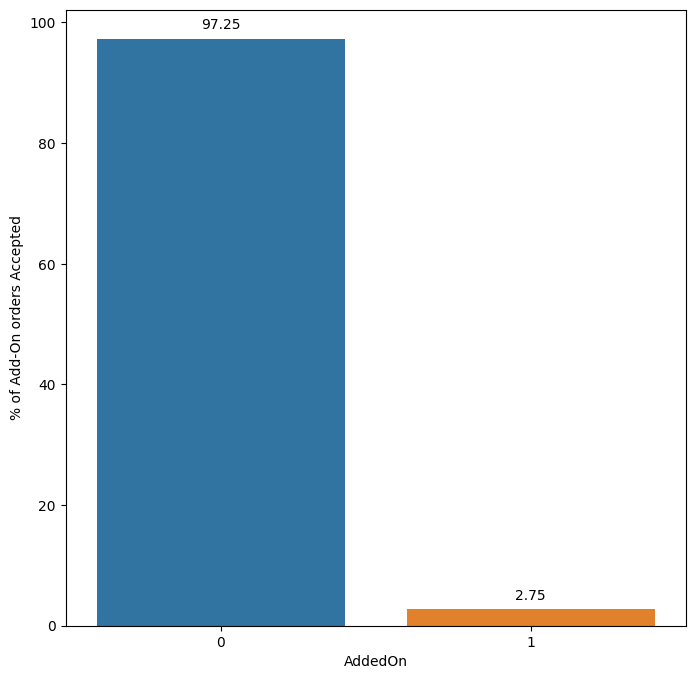

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.barplot(x='AddedOn', y=np.ones(len(uber_df)), data= uber_df, estimator=lambda x: len(x)*100.0/len(uber_df), ci=None,)
for p in ax.patches: ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax.set_ylabel("% of Add-On orders Accepted")
plt.show()

<ipython-input-70-e869e019d554>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Addon', y=np.ones(len(uber_df)), data= uber_df, estimator=lambda x: len(x)*100.0/len(uber_df), ci=None,)


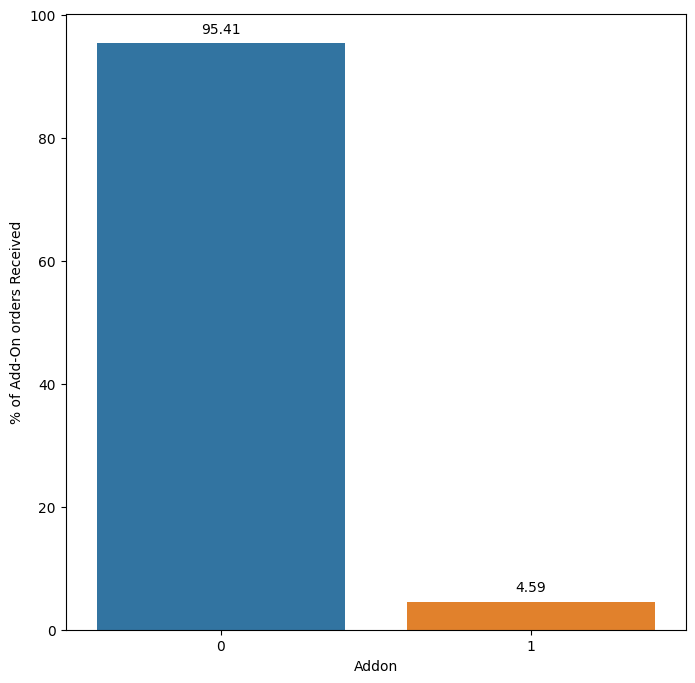

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.barplot(x='Addon', y=np.ones(len(uber_df)), data= uber_df, estimator=lambda x: len(x)*100.0/len(uber_df), ci=None,)
for p in ax.patches: ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax.set_ylabel("% of Add-On orders Received")
plt.show()

<ipython-input-282-11fc7207e7bb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(uber_df['Expected Earnings'])


<Axes: xlabel='Expected Earnings', ylabel='Density'>

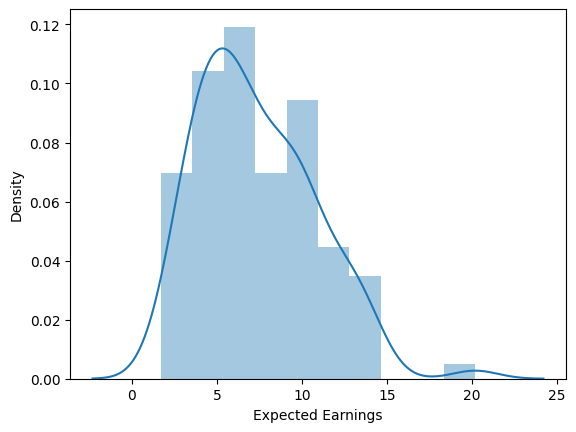

In [282]:
sns.distplot(uber_df['Expected Earnings'])

<ipython-input-283-cbfa349ea2bf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(uber_df['ActualEarnings'])


<Axes: xlabel='ActualEarnings', ylabel='Density'>

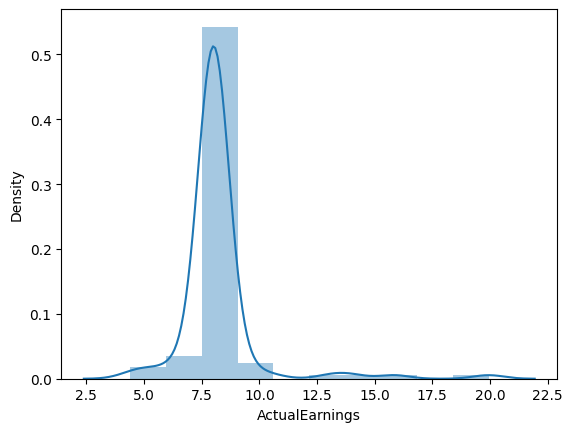

In [283]:
sns.distplot(uber_df['ActualEarnings'])

<ipython-input-284-d30b216dd25f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(uber_df['Hourly'])


<Axes: xlabel='Hourly', ylabel='Density'>

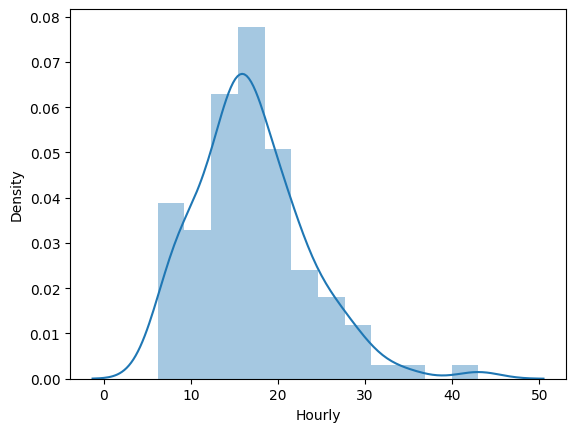

In [284]:
sns.distplot(uber_df['Hourly'])

<ipython-input-285-02335bedd6a2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(uber_df['Tip'])


<Axes: xlabel='Tip', ylabel='Density'>

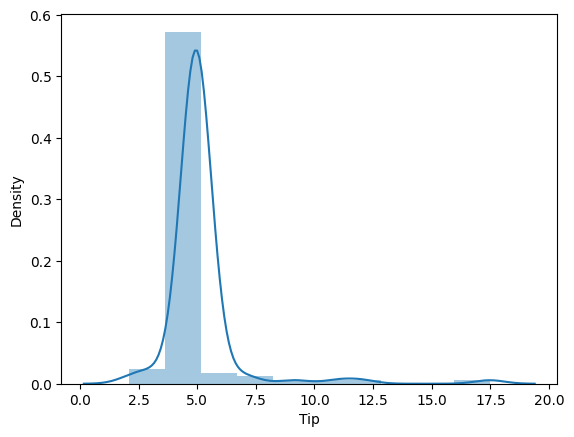

In [285]:
sns.distplot(uber_df['Tip'])

<ipython-input-286-b7eb29cbe236>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(uber_df['ActualTime'])
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='ActualTime', ylabel='Density'>

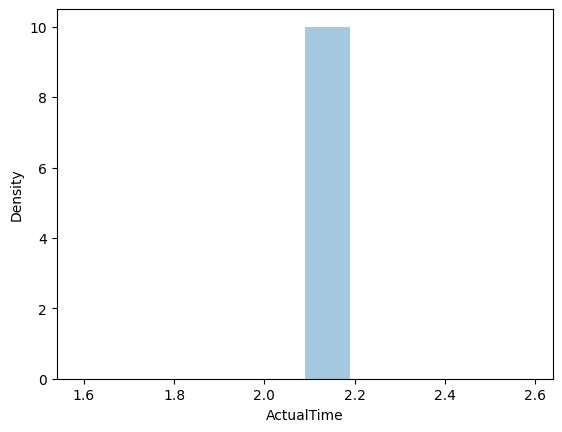

In [286]:
#This column is tampering with the statistical significance of the data
sns.distplot(uber_df['ActualTime'])

<ipython-input-291-5cde2770f678>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(uber_df['BaseFare'])


<Axes: xlabel='BaseFare', ylabel='Density'>

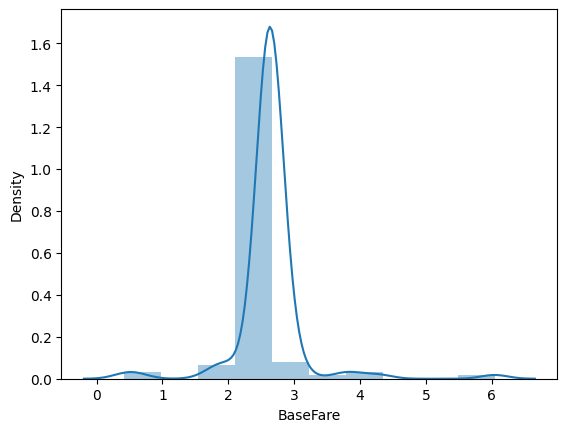

In [291]:
sns.distplot(uber_df['BaseFare'])

<ipython-input-292-5eb52b70cea1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(uber_df['Promotion'])


<Axes: xlabel='Promotion', ylabel='Density'>

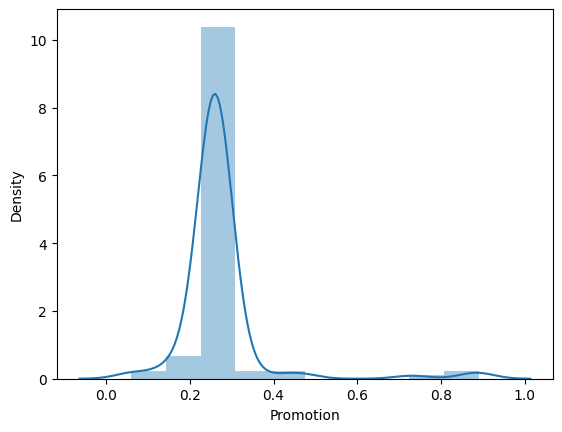

In [292]:
sns.distplot(uber_df['Promotion'])

<ipython-input-295-6f2ebdbdbea9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(uber_df['ActualBoost'])


<Axes: xlabel='ActualBoost', ylabel='Density'>

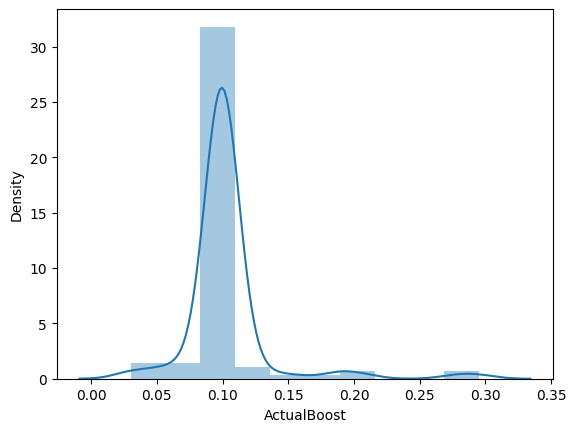

In [295]:
sns.distplot(uber_df['ActualBoost'])

# Clean Data Export

Actual Time was showing a very degrading statistical significance as of when predicte time is available by it's very difficult to calculate buffer time as it varies location wise.

In [300]:
uber_df = uber_df.drop(['ActualTime'], axis =1)

In [301]:
uber_df.head(6)

,Date,DayOfWeek,Time,Expected Earnings,ActualEarnings,Time predicted,Hourly,Distance,Accepted,Boost,ActualBoost,BaseFare,Promotion,Tip,NumberOfDeliveries,Addon,AddedOn,Cancled
0,10/17/2022,Monday,18:34,4.68,8.02,21,13.371429,3.9,0,1.4,0.099476,2.63,0.26,4.95,1,0,0,0
1,10/17/2022,Monday,18:35,7.02,8.02,24,17.550000,5.2,0,1.4,0.099476,2.63,0.26,4.95,1,0,0,0
2,10/17/2022,Monday,18:36,9.53,8.02,36,15.883333,8.4,0,1.4,0.099476,2.63,0.26,4.95,2,0,0,0
3,10/17/2022,Monday,18:37,6.21,6.21,17,21.917647,3.6,1,1.4,0.133333,1.95,0.26,4.00,1,0,0,0
4,10/17/2022,Monday,18:41,2.44,8.02,15,9.760000,2.6,0,1.4,0.099476,2.63,0.26,4.95,1,1,0,0
5,10/17/2022,Monday,18:54,13.72,8.02,34,24.211765,15.2,0,1.4,0.099476,2.63,0.26,4.95,1,0,0,0


In [302]:
uber_df.to_csv('uber_data_cleaned.csv')